In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
tp=sns.load_dataset('tips')
tp.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tp.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
day_encoder = LabelEncoder()
time_encoder = LabelEncoder()

In [6]:
#check the no of males and females in tha data
tp['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [7]:
tp['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [8]:
tp['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [9]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
x = tp[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tp[['tip']]

In [11]:
import warnings
warnings.filterwarnings("ignore")

sex_encoder.fit(pd.DataFrame(x['sex']))
x['sex']=sex_encoder.transform(x['sex'])

smoker_encoder.fit(pd.DataFrame(x['smoker']))
x['smoker']=smoker_encoder.transform(x['smoker'])

day_encoder.fit(pd.DataFrame(x['day']))
x['day']=day_encoder.transform(x['day'])

time_encoder.fit(pd.DataFrame(x['time']))
x['time']=time_encoder.transform(x['time'])

In [12]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
x['sex'].value_counts()

1    157
0     87
Name: sex, dtype: int64

In [14]:
x['smoker'].value_counts()

0    151
1     93
Name: smoker, dtype: int64

In [15]:
x['day'].value_counts()

1    87
2    76
3    62
0    19
Name: day, dtype: int64

In [16]:
x['time'].value_counts()

0    176
1     68
Name: time, dtype: int64

In [17]:
x['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [18]:
# 0 is representing Friday
# 1 is representing Saturday
# 2 is representing Sunday
# 3 is represenrting Thursday
x['day'].value_counts()

1    87
2    76
3    62
0    19
Name: day, dtype: int64

In [19]:
cormat = x.corr()
cormat

,total_bill,sex,smoker,day,time,size
total_bill,1.000000,0.144877,0.085721,-0.043550,-0.183118,0.598315
sex,0.144877,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.086195,-0.133178,0.069510,-0.103411,1.000000


<Axes: >

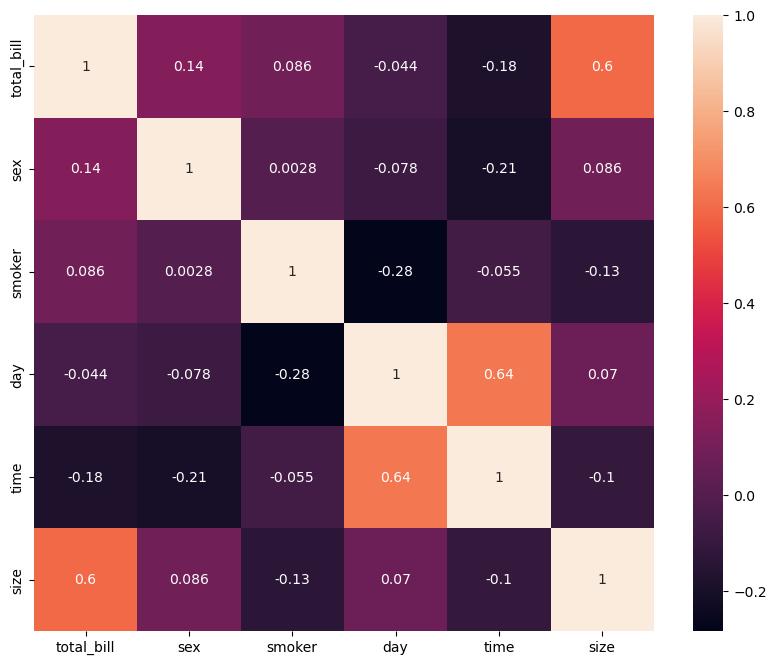

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(x.corr() , annot = True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x ,y,test_size=0.2 , random_state=42)

In [23]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((195, 6), (49, 6), (195, 1), (49, 1))

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()

In [26]:
#training of the dataset of x-train and y-train
model.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

In [29]:
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("the r2 square is",score)
print("the mean squared error is",mse)
print("the mean absolute error is",mae)
print("root mean square error is",rmse)

the r2 square is 0.4441368826121932
the mean squared error is 0.694812968628771
the mean absolute error is 0.6703807496461157
root mean square error is 0.8335544185167343


In [30]:
import joblib
joblib.dump(model, 'tipsproject.pkl')

['tipsproject.pkl']